In [ ]:
'''
Author: Ken
git : https://github.com/PlayingNumbers/ds_salary_proj
Tutorial(youtube) : https://www.youtube.com/watch?v=fhi4dOhmW-g&list=PL2zq7klxX5ASFejJj80ob9ZAnBHdz5O1t&index=3

Inspired by (Tutorial) : https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905

Disclaimer: I don't own the copyrights of the code , It was written and coded as
            followed on the youtube channel as mentioned above, I have add extra comments for 
            my reference to make code understandable.
            P.S. : please take a note that I have changed the names of the column and files according to my need
                   , if you are copy pasting this code you have to look for syntax errors in names of files and
                   data-columns that are used in tutorial
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleansed.csv')

In [3]:
df.head()

Job Title                 Salary Estimate  \
0               Data Scientist  $125K - $154K (Glassdoor est.)   
1               Data Scientist   $83K - $135K (Glassdoor est.)   
2    Machine Learning Engineer   $64K - $116K (Glassdoor est.)   
3               Data Scientist   $64K - $106K (Glassdoor est.)   
4  Data & Analytics Consultant   $81K - $123K (Glassdoor est.)   

                Job Function  \
0             Data Scientist   
1             Data Scientist   
2  Machine Learning Engineer   
3             Data Scientist   
4       Analytics Consultant   

                                     Job Description  \
0  Are you passionate about using data, finding i...   
1  Data Scientist\n\nLanguage: English\n\nLocatio...   
2  We are engineers, high line workers, power pla...   
3  Secure our Nation, Ignite your Future\nOvervie...   
4  WHO WE LOOK FOR\n\nAn SEI Consultant is a mast...   

                        Company Name  Rating         Location  \
0                    TaylorMade Golf     4.3     Carlsbad, CA   
1                            Buckman     3.8      Memphis, TN   
2                         CPS Energy     3.6  San Antonio, TX   
3  ManTech International Corporation     4.3   Alexandria, VA   
4                                SEI     4.6   Cincinnati, OH   

                      Size  Founded  Type of ownership  ... max_salary  \
0   1001 to 5000 Employees     1979  Company - Private  ...        154   
1   1001 to 5000 Employees     1945  Company - Private  ...        135   
2   1001 to 5000 Employees     1942      Self-employed  ...        116   
3  5001 to 10000 Employees     1968   Company - Public  ...        106   
4     201 to 500 Employees     1992  Company - Private  ...        123   

  avg_salary                     company_txt  job_state  age  python_yn  R_yn  \
0      139.5                    TaylorMade G         CA   41          0     0   
1      109.0                            Buck         TN   75          0     0   
2       90.0                         CPS Ene         TX   78          0     0   
3       85.0  ManTech International Corporat         VA   52          0     0   
4      102.0                             NaN         OH   28          0     0   

   spark aws excel  
0      0   0     0  
1      0   0     0  
2      0   0     0  
3      0   0     0  
4      0   0     1  

[5 rows x 26 columns]

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel'],
      dtype='object')

In [5]:
def title_simplifer(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
## job title and seniority
    

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifer)

In [7]:
df.job_simp.value_counts()

data scientist    19
na                14
analyst           13
data engineer     10
manager            2
mle                1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        54
senior     5
Name: seniority, dtype: int64

In [10]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower != 'los angeles' else 'CA')
df.job_state.value_counts()


TX    7
MD    6
IL    4
DE    3
NJ    3
MA    3
CA    3
IN    3
ID    2
MO    2
MN    2
PA    2
TN    2
VA    2
WA    2
CO    2
NC    1
NE    1
NY    1
OH    1
RI    1
ND    1
IA    1
KS    1
NM    1
MI    1
DC    1
Name: job_state, dtype: int64

In [11]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority'],
      dtype='object')

In [12]:
#df.drop('job state', inplace = True, axis =1)

In [13]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority'],
      dtype='object')

In [14]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0     1394
1     2114
2      558
3      947
4     2342
5     1684
6     1224
7      866
8     3133
9     2386
10     538
11     759
12    1495
13    2739
14    1137
15    1243
16    1049
17     377
18     808
19    2339
20     808
21     377
22    2339
23     576
24     462
25    3325
26     841
27    2255
28     925
29    1079
30     684
31    1021
32    1255
33     534
34     965
35     615
36    1637
37    1131
38     789
39    1067
40    1035
41     757
42    1946
43    1278
44    1327
45    2272
46     819
47     986
48     678
49     620
50     530
51     969
52     740
53     979
54     654
55    2364
56    2364
57     631
58    1014
Name: desc_len, dtype: int64

In [15]:
# !!! 'Competitors' column is not available in current dataset
# df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [16]:
#hourly wage into annual
df['min_salary_calc'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis = 1)

In [17]:
df[df.hourly==0][['hourly','min_salary_calc','min_salary','max_salary']]

hourly  min_salary_calc  min_salary  max_salary
0        0              125         125         154
1        0               83          83         135
2        0               64          64         116
3        0               64          64         106
4        0               81          81         123
5        0               90          90         105
6        0              140         140         150
7        0               46          46         120
8        0               33          33          59
9        0               79          79         136
10       0               94          94         150
11       0               42          42          77
12       0               41          41          74
13       0               73          73         118
14       0              113         113         137
15       0              101         101         161
16       0               65          65         121
17       0               40          40          73
18       0               46          46          87
19       0              117         117         138
20       0               46          46          87
21       0               40          40          73
22       0              117         117         138
23       0               48          48          84
24       0               95          95         176
25       0               60          60          63
26       0               53          53          62
27       0               98          98         144
28       0               71          71         125
29       0              111         111         126
30       0               33          33          57
31       0               86          86         150
32       0               61          61          84
33       0               48          48          82
34       0               38          38          66
35       0               43          43          77
36       0               88          88         145
37       0               85          85         126
38       0               60          60         113
39       0               48          48          56
40       0               46          46          94
41       0              137         137         155
42       0               66          66         112
43       0               42          42          93
44       0               68          68         104
45       0              100         100         160
46       0               27          27          48
47       0               43          43          96
48       0              103         103         120
49       0               44          44          76
50       0               52          52          95
51       0               33          33          73
52       0               51          51         110
53       0               77          77         127
54       0               98          98         158
55       0               58          58         113
56       0               58          58         113
57       0               93          93         165
58       0               83          83         100

In [18]:
df['company_txt']

0                                     TaylorMade G
1                                             Buck
2                                          CPS Ene
3                   ManTech International Corporat
4                                              NaN
5                                            XL Fl
6                                            LiveR
7                                             Fort
8                                           divvyD
9      Johns Hopkins Applied Physics Laboratory (A
10                                      CNA Insura
11                                 Crew Carwash, I
12                                            GeoB
13                                            Bluc
14                            HotSpot Therapeutics
15                                      Alteryx, I
16                               McCarthy Building
17                           Texas Trust Credit Un
18                         Idaho Central Credit Un
19                             

In [19]:
##### actual EDA "Exploration Data Analysis"

In [20]:
df.describe()

Rating      Founded  hourly  employer_provided_salary  min_salary  \
count  59.000000    59.000000    59.0                      59.0   59.000000   
mean    3.423729  1731.593220     0.0                       0.0   70.254237   
std     1.594964   642.342994     0.0                       0.0   28.511699   
min    -1.000000    -1.000000     0.0                       0.0   27.000000   
25%     3.450000  1929.000000     0.0                       0.0   46.000000   
50%     3.700000  1968.000000     0.0                       0.0   64.000000   
75%     4.300000  1996.500000     0.0                       0.0   91.500000   
max     5.000000  2018.000000     0.0                       0.0  140.000000   

       max_salary  avg_salary         age  python_yn  R_yn      spark  \
count   59.000000    59.00000   59.000000  59.000000  59.0  59.000000   
mean   109.932203    90.09322   48.508475   0.016949   0.0   0.016949   
std     32.922513    29.47405   43.287480   0.130189   0.0   0.130189   
min     48.000000    37.50000   -1.000000   0.000000   0.0   0.000000   
25%     83.000000    65.50000   13.000000   0.000000   0.0   0.000000   
50%    113.000000    86.50000   41.000000   0.000000   0.0   0.000000   
75%    136.500000   117.25000   78.000000   0.000000   0.0   0.000000   
max    176.000000   146.00000  158.000000   1.000000   0.0   1.000000   

             aws      excel     desc_len  min_salary_calc  
count  59.000000  59.000000    59.000000        59.000000  
mean    0.033898   0.067797  1250.508475        70.254237  
std     0.182521   0.253555   725.787619        28.511699  
min     0.000000   0.000000   377.000000        27.000000  
25%     0.000000   0.000000   748.500000        46.000000  
50%     0.000000   0.000000  1014.000000        64.000000  
75%     0.000000   0.000000  1566.000000        91.500000  
max     1.000000   1.000000  3325.000000       140.000000

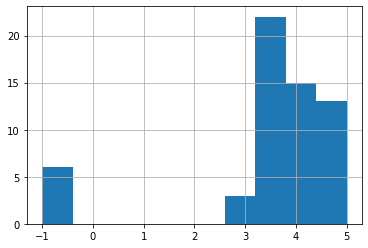

In [21]:
df.Rating.hist() # now get some visualization

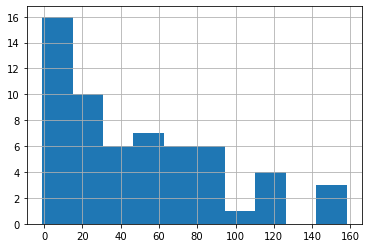

In [22]:
df.age.hist()

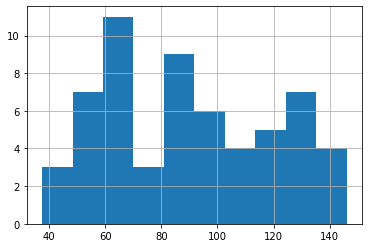

In [23]:
df.avg_salary.hist()

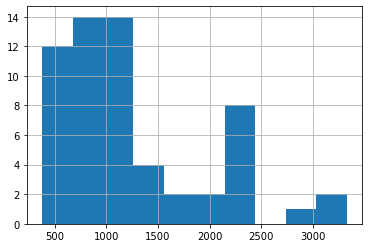

In [24]:
df.desc_len.hist()

In [25]:
#^^^^ the above was all "histogram"

In [26]:
########### now for boxplot()

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'min_salary_calc'],
      dtype='object')

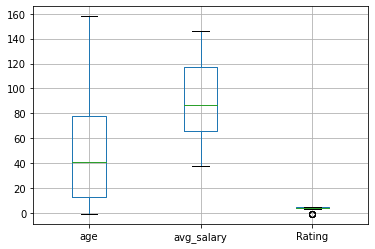

In [28]:
df.boxplot(column = ['age','avg_salary','Rating']) # please avoid textual values columns

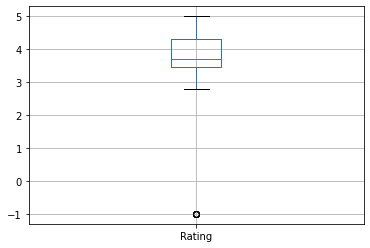

In [29]:
df.boxplot(column = 'Rating')

In [30]:
########### correlation now

In [31]:
df[['age','avg_salary','Rating','desc_len']].corr()

age  avg_salary    Rating  desc_len
age         1.000000    0.025638  0.336524  0.014052
avg_salary  0.025638    1.000000  0.026726  0.151026
Rating      0.336524    0.026726  1.000000  0.082344
desc_len    0.014052    0.151026  0.082344  1.000000

In [32]:
##### heatmap

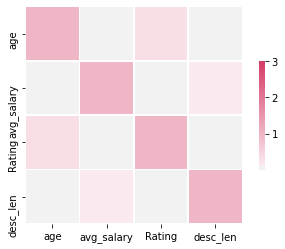

In [33]:
cmap = sns.diverging_palette(500, 1, as_cmap = True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=3, center=0,cmap = cmap, square=True,
           linewidths=.5, cbar_kws={"shrink": .5})

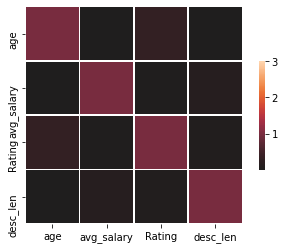

In [34]:
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=3, center=0, square=True,
           linewidths=.5, cbar_kws={"shrink": .5})

In [35]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'min_salary_calc'],
      dtype='object')

In [36]:
df_cat = df[['Location','Size','Type of ownership','Industry','Sector','Revenue','Company Name','job_state','python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority']]

In [37]:
df_cat.columns

Index(['Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Company Name', 'job_state', 'python_yn', 'R_yn', 'spark',
       'aws', 'excel', 'job_simp', 'seniority'],
      dtype='object')

graph for Location: total = 48


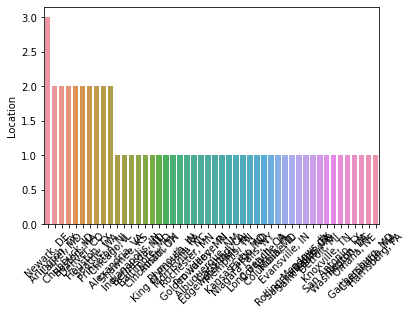

graph for Size: total = 8


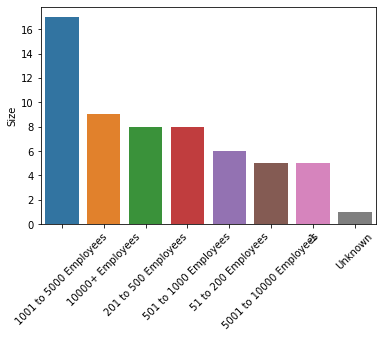

graph for Type of ownership: total = 7


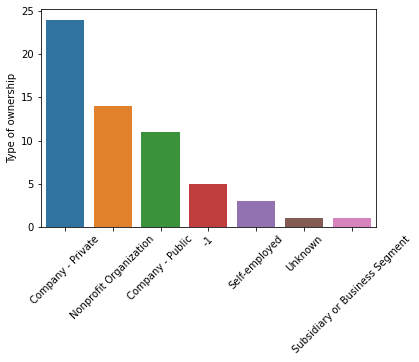

graph for Industry: total = 28


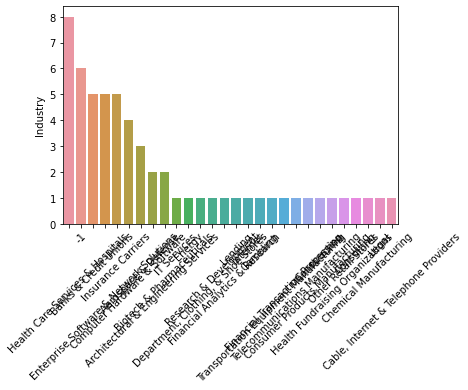

graph for Sector: total = 16


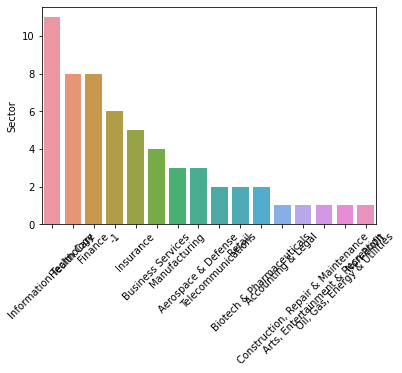

graph for Revenue: total = 13


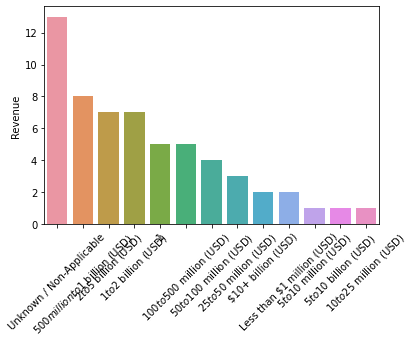

graph for Company Name: total = 51


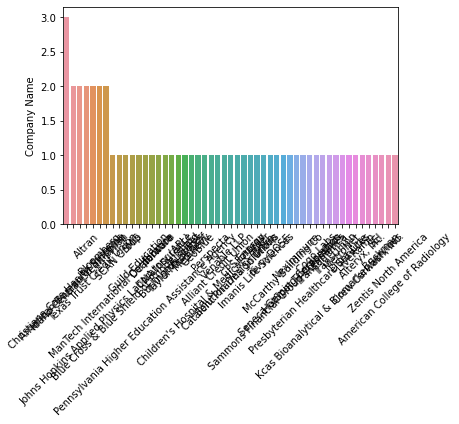

graph for job_state: total = 27


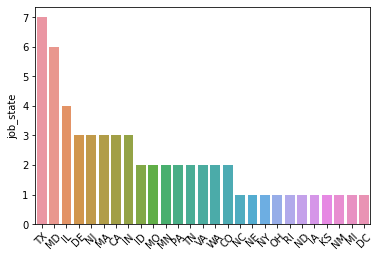

graph for python_yn: total = 2


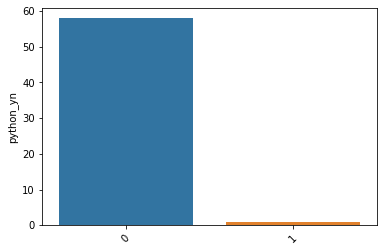

graph for R_yn: total = 1


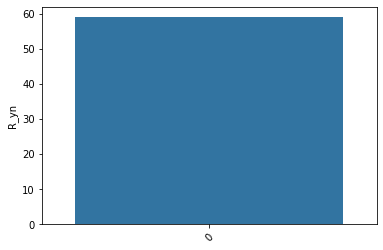

graph for spark: total = 2


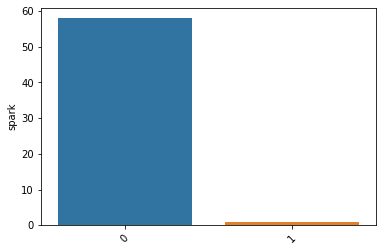

graph for aws: total = 2


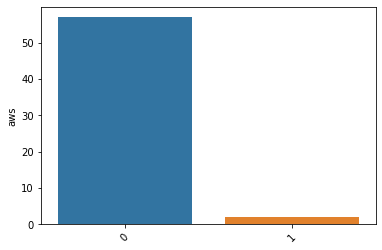

graph for excel: total = 2


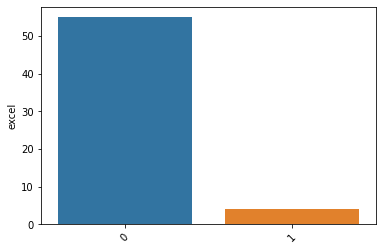

graph for job_simp: total = 6


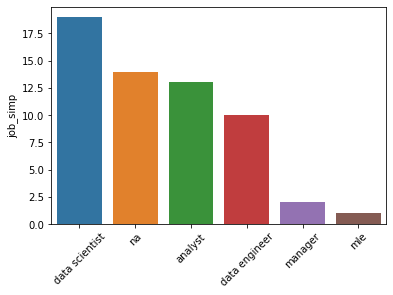

graph for seniority: total = 2


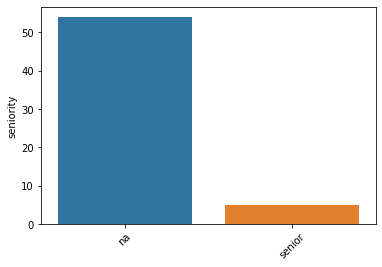

In [38]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
    plt.show()

graph for Location: total = 20


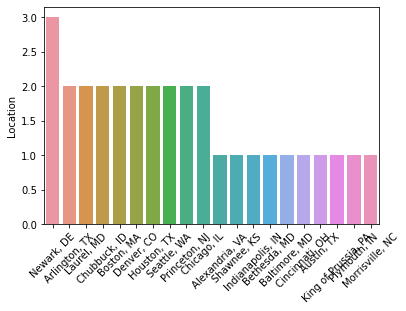

graph for Company Name: total = 20


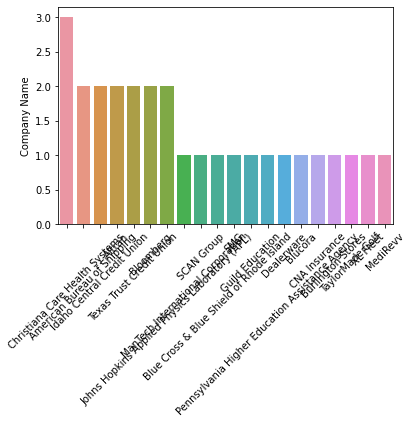

graph for job_state: total = 20


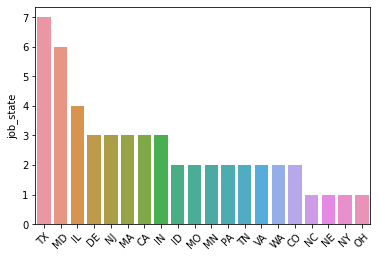

In [39]:
for i in df_cat[['Location','Company Name','job_state']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
    plt.show()

In [40]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'min_salary_calc'],
      dtype='object')

In [41]:
####### Pivot table

In [42]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

avg_salary
job_simp                  
analyst          55.769231
data engineer    94.500000
data scientist  109.868421
manager         109.750000
mle              90.000000
na               89.178571

In [43]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          55.000000
               senior      65.000000
data engineer  na          94.500000
data scientist na         109.617647
               senior     112.000000
manager        na         109.750000
mle            na          90.000000
na             na          82.958333
               senior     126.500000

In [44]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WA        na              118.500000
          data engineer   105.500000
VA        data scientist   87.000000
TX        mle              90.000000
          manager         146.000000
          data scientist   95.500000
          data engineer    85.500000
          analyst          56.500000
TN        data scientist  109.000000
          analyst          52.000000
RI        analyst          66.000000
PA        analyst          61.250000
OH        na              102.000000
NY        analyst          37.500000
NM        data scientist  102.000000
NJ        data scientist  117.666667
NE        data engineer    86.500000
ND        analyst          52.000000
NC        na               69.500000
MO        data engineer    92.250000
MN        na               57.500000
          data engineer   129.000000
MI        data scientist   97.500000
MD        na               96.750000
          data scientist  106.500000
          data engineer   135.500000
          analyst          70.000000
MA        na              125.000000
          data scientist  131.000000
          analyst          61.500000
KS        na               53.000000
IN        analyst          52.250000
          na               72.500000
IL        na              128.000000
          data scientist  119.250000
          analyst          46.000000
ID        data engineer    66.500000
IA        manager          73.500000
DE        na               69.333333
DC        data scientist   60.000000
CO        na              121.000000
          data scientist  118.000000
CA        data scientist  132.000000

In [45]:
pd.set_option('display.max_rows', None) # code to max zoom the data frame

In [46]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_state            
CA         132.000000
MA         131.000000
IL         119.250000
CO         118.000000
NJ         117.666667
TN         109.000000
MD         106.500000
NM         102.000000
MI          97.500000
TX          95.500000
VA          87.000000
DC          60.000000

In [47]:
# salary by rating

In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Function', 'Job Description',
       'Company Name', 'Rating', 'Location', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'hourly',
       'employer_provided_salary', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'min_salary_calc'],
      dtype='object')

In [49]:
df_pivots = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly',
               'employer_provided_salary','job_state','age','python_yn','R_yn','spark','aws','excel','job_simp',
               'seniority','desc_len']]

In [50]:
for i in df_pivots.columns:
    if (i!='avg_salary'):
        print("---------------"+i+"--------------------")    
        print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

---------------Rating--------------------
        avg_salary
Rating            
 4.3    123.166667
 4.7    118.750000
 4.1    114.500000
 5.0    108.833333
 3.6     95.214286
-1.0     94.166667
 3.0     91.500000
 4.9     90.500000
 4.0     87.000000
 3.7     86.833333
 3.5     80.500000
 3.8     80.333333
 3.4     78.500000
 4.5     75.333333
 2.8     73.500000
 4.6     73.500000
 3.3     62.500000
 4.8     59.500000
---------------Size--------------------
                         avg_salary
Size                               
Unknown                  125.000000
5001 to 10000 Employees  113.700000
51 to 200 Employees       96.083333
10000+ Employees          88.055556
-1                        88.000000
1001 to 5000 Employees    87.617647
501 to 1000 Employees     86.937500
201 to 500 Employees      78.500000
---------------Type of ownership--------------------
                                avg_salary
Type of ownership                         
Subsidiary or Business Segment  118.000

In [51]:
pd.pivot_table(df_pivots, index = 'Revenue',columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn                            0    1
Revenue                                    
$1 to $2 billion (USD)             7.0  NaN
$10 to $25 million (USD)           1.0  NaN
$10+ billion (USD)                 2.0  NaN
$100 to $500 million (USD)         5.0  NaN
$2 to $5 billion (USD)             7.0  NaN
$25 to $50 million (USD)           3.0  NaN
$5 to $10 billion (USD)            1.0  NaN
$5 to $10 million (USD)            1.0  NaN
$50 to $100 million (USD)          4.0  NaN
$500 million to $1 billion (USD)   8.0  NaN
-1                                 5.0  NaN
Less than $1 million (USD)         2.0  NaN
Unknown / Non-Applicable          12.0  1.0

In [52]:
#!pip install wordcloud

In [53]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [54]:
#!python -m nltk.downloader stopwords

In [55]:
#!python -m nltk.downloader punkt

In [56]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


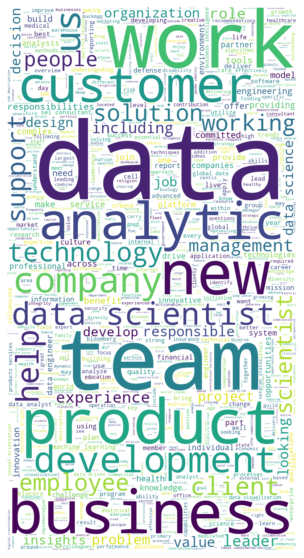

In [57]:
#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop wprds"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])
#text = " ".join([ele for ele in words_filtered if ele not in unwanted])

#wc = WordCloud(background_color="white",random_state=1, mask=mask_logo, stopwords=STOPWORDS, max_words = 2000,
 #             width = 800, height = 1500)
wc = WordCloud(background_color="white",random_state=1,stopwords=STOPWORDS, max_words = 2000,
              width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
           #plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

In [59]:
df_pivots.columns


Index(['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'hourly', 'employer_provided_salary', 'job_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [60]:
df_pivots.to_csv('eda_data.csv',index = False)